In [1]:
import keras

C:\Users\S795641\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
import matplotlib.pyplot as plt

In [4]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


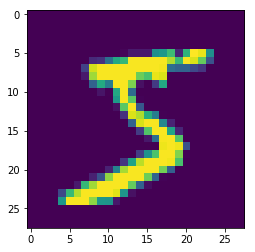

In [5]:
plt.imshow(X_train[0])

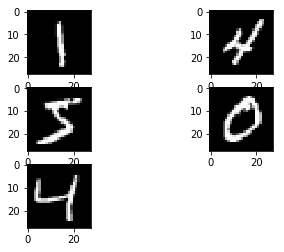

In [41]:
plt.subplot(321)
plt.imshow(X_train[8], cmap=plt.get_cmap("gray"))
plt.subplot(322)
plt.imshow(X_train[9], cmap=plt.get_cmap("gray"))
plt.subplot(323)
plt.imshow(X_train[0], cmap=plt.get_cmap("gray"))
plt.subplot(324)
plt.imshow(X_train[1], cmap=plt.get_cmap("gray"))
plt.subplot(325)
plt.imshow(X_train[2], cmap=plt.get_cmap("gray"))
plt.show()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
Y_train.shape

(60000,)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
X_train[0].shape

(28, 28)

In [16]:
Y_train[0]

5

In [43]:
from keras.models import Sequential
from keras.layers  import Dense, Dropout, Flatten

In [44]:
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [45]:
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering("th")

In [46]:
import numpy as np
seed = 7
np.random.seed(seed)

In [49]:
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')

In [50]:
#Normalizing the inputs
X_train = X_train/255
X_test = X_test/255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [55]:
num_classes = Y_test.shape[1] #we will get unique number of labels.

In [57]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32,(5,5), input_shape=(1,28,28), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    return model

In [59]:
model = baseline_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 100s - loss: 0.2443 - acc: 0.9297 - val_loss: 0.0847 - val_acc: 0.9747
Epoch 2/10
 - 112s - loss: 0.0729 - acc: 0.9788 - val_loss: 0.0499 - val_acc: 0.9839
Epoch 3/10
 - 111s - loss: 0.0528 - acc: 0.9837 - val_loss: 0.0413 - val_acc: 0.9858
Epoch 4/10
 - 126s - loss: 0.0404 - acc: 0.9878 - val_loss: 0.0392 - val_acc: 0.9877
Epoch 5/10
 - 118s - loss: 0.0331 - acc: 0.9897 - val_loss: 0.0344 - val_acc: 0.9885
Epoch 6/10
 - 149s - loss: 0.0279 - acc: 0.9911 - val_loss: 0.0325 - val_acc: 0.9898
Epoch 7/10
 - 189s - loss: 0.0223 - acc: 0.9930 - val_loss: 0.0343 - val_acc: 0.9890
Epoch 8/10
 - 184s - loss: 0.0197 - acc: 0.9937 - val_loss: 0.0321 - val_acc: 0.9893
Epoch 9/10
 - 185s - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0371 - val_acc: 0.9889
Epoch 10/10
 - 180s - loss: 0.0146 - acc: 0.9955 - val_loss: 0.0392 - val_acc: 0.9882


In [62]:
model.predict(X_test)

array([[1.38026994e-11, 5.44570278e-10, 1.32034970e-08, ...,
        1.00000000e+00, 2.96605629e-10, 6.99974967e-09],
       [3.84133543e-08, 1.07701123e-06, 9.99997020e-01, ...,
        1.06123565e-11, 2.07403695e-11, 1.00854702e-09],
       [2.37216818e-06, 9.99986410e-01, 4.79494872e-07, ...,
        7.40982068e-06, 1.54061240e-06, 1.25028492e-07],
       ...,
       [1.51798181e-14, 8.49391490e-09, 4.88284760e-13, ...,
        1.38829845e-08, 1.28663835e-08, 1.32392856e-07],
       [1.84554068e-07, 1.42871283e-12, 3.32271699e-13, ...,
        4.39125611e-11, 7.72488704e-07, 1.87446586e-11],
       [2.92997328e-11, 3.69614414e-13, 5.72334888e-12, ...,
        1.64107776e-16, 3.18232024e-10, 3.76421810e-12]], dtype=float32)

In [66]:
X_test.shape

(10000, 1, 28, 28)

In [123]:
X_test[0].reshape(1,1,28,28).shape

(1, 1, 28, 28)

In [70]:
kathi = model.predict(X_test[0].reshape(1,1,28,28))
i,j = np.unravel_index(kathi.argmax(), kathi.shape) #j is the value of the predicted image.

In [71]:
print(j)

In [72]:
plt.imshow(X_test[0].reshape(28,28))

0 7


In [80]:
from scipy import misc
t_img = misc.imread('3.png', flatten="True")
print(t_img.shape)


(28, 28)


C:\Users\S795641\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [81]:
kathi1 = model.predict(t_img.reshape(1,1,28,28))
i,j = np.unravel_index(kathi1.argmax(), kathi1.shape) #j is the value of the predicted image.
print(j)

5


In [87]:
t_50_img = misc.imread("3_50.png", flatten="True")
t_50_28_resized_img = misc.imresize(t_50_img, (28,28), interp="bilinear")
print(t_50_28_resized_img.shape)

(28, 28)


C:\Users\S795641\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
C:\Users\S795641\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [85]:
kathi1 = model.predict_classes(t_img.reshape(1,1,28,28))
print(kathi1)

[5]


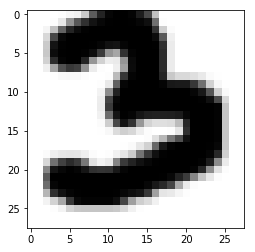

In [91]:
plt.imshow(t_50_28_resized_img, cmap=plt.get_cmap("gray"))

In [92]:
model.predict_classes(t_50_28_resized_img.reshape(1,1,28,28))

array([5], dtype=int64)

C:\Users\S795641\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


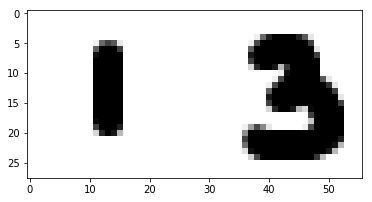

In [136]:
img_4 = misc.imread("1_3.png", flatten="True")
#img_4_resized = misc.imresize(img_4, (28,28), interp="bilinear")
#plt.imshow(img_4_resized, cmap=plt.get_cmap("gray"))
plt.imshow(img_4, cmap=plt.get_cmap("gray"))
plt.show()

In [125]:
model.predict_classes(np.invert(img_4_resized).reshape(1,1,28,28))

array([6], dtype=int64)

value of the 1 picture is :  [1]
value of the 2 picture is :  [3]


C:\Users\S795641\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


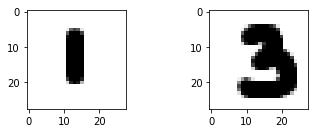

In [138]:
#For splitting of the multiple images in a picture

multiple_numbers = np.split(img_4, 2, axis=1)
for k in range(len(multiple_numbers)):
    plt.subplot(221+k)
    plt.imshow(multiple_numbers[k], cmap=plt.get_cmap("gray"))
    resize_img = misc.imresize(multiple_numbers[k], (28,28), interp="bilinear")
    print("value of the "+str(k+1)+" picture is : ",model.predict_classes(np.invert(resize_img).reshape(1,1,28,28)))
plt.show()